In [1]:
import numpy as np
import matplotlib.pyplot as plt

std::_Bind<void(autoware::perception::filters...
0x56244DB9C4D0
2854 10838.385 693.001


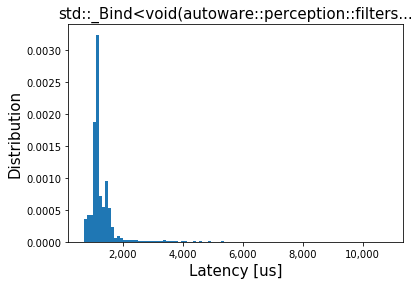

In [2]:
#voxel_grid_node:callback1 duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

c = '94713922831568'
t=[]
with open(path) as f:
    l = f.readlines()
S = l.index('Callback instances:\n')
E = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S:E] if c in line]
#print(l_XXX)
#print(cb1)
S = l.index('Callback symbols:\n')
E = l.index('Callback instances:\n')  
cb1_name = [line for line in l[S:E] if c in line]
cb1_name = ''.join(cb1_name)
cb1_name = cb1_name.split()[2]+cb1_name.split()[3]
print(cb1_name)

cb = str(hex(int(c)))
cb = cb.upper().replace('X', 'x')
print(cb)

cb1d = []
for i in l_XXX:
    #print(i)
    cb1d.append(int(i.split()[3])) 
cb1d_us = []
for i in cb1d:
    cb1d_us.append(i/1000)
print(len(cb1d_us),max(cb1d_us),min(cb1d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb1d_us, bins=100, density=True)
plt.title(cb1_name, fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.legend(fontsize=18)
#plt.tick_params(labelsize=18)
#plt.xlim(0,3000000)
plt.savefig("cb1d.pdf")

2854 6136.413 112.037


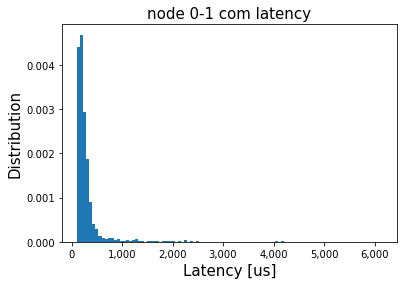

In [3]:
#calculate the cb0 - cb1 com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

com1_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com1_latency_ns.append(com)

com1_latency_us = []
for i in com1_latency_ns:
    com1_latency_us.append(i/1000)
print(len(com1_latency_us),max(com1_latency_us),min(com1_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com1_latency_us, bins=100, density=True)
plt.title('node 0-1 com latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,1000000)
plt.savefig("cb01latency.pdf")

2854
2854 284742465 577209
0x55B682A150C0
2854 284742.465 577.209
12251.914774001401


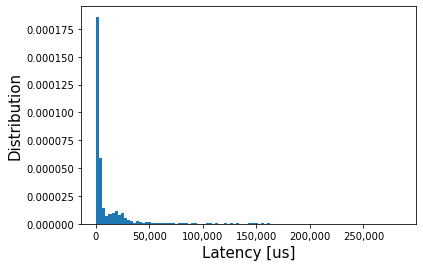

In [4]:
#p2d_ndt_localiz:callback2 duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'

c = '94242364018880' # callback symbol

f = open(path)
#print(type(f))
f.close()

with open(path) as f:
    l = f.readlines()
    
# S = l.index('Callback symbols:\n')
# E = l.index('Callback instances:\n')  
# cb2_name = [line for line in l[S:E] if c in line]
# cb2_name = ''.join(cb2_name)
# cb2_name = cb2_name.split()[2]
# print(cb2_name)

S = l.index('Callback instances:\n')
E = l.index('Lifecycle state machines:\n') 
#print(S,E)

cb2 = [line for line in l[S:E] if c in line]
print(len(cb2))

cb2d = []
for i in cb2:
    #print(i)
    cb2d.append(int(i.split()[3])) 
print(len(cb2d),max(cb2d),min(cb2d))

cb = str(hex(int(c)))
cb = cb.upper().replace('X', 'x')
print(cb)

cb2d_us = []
for i in cb2d:
    cb2d_us.append(i/1000)
print(len(cb2d_us),max(cb2d_us),min(cb2d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb2d_us, bins=100, density=True)
# plt.title(cb2_name.split('::')[3], fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,200000)
plt.savefig("cb2d.pdf")
print(np.average(cb2d_us))

0x55B682A150C0
2854 6397.763 78.292


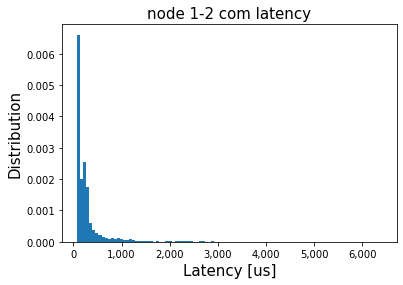

In [5]:
#calculate the cb1 - cb2 com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

print(cb)
com2_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com2_latency_ns.append(com)

com2_latency_us = []
for i in com2_latency_ns:
    com2_latency_us.append(i/1000)
print(len(com2_latency_us),max(com2_latency_us),min(com2_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com2_latency_us, bins=100, density=True)
plt.title('node 1-2 com latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,1000000)
plt.savefig("cb12latency.pdf")

2852
2852 14539280 811949
0x561CEEA9A730
2852 14539.28 811.949
1406.839180224404


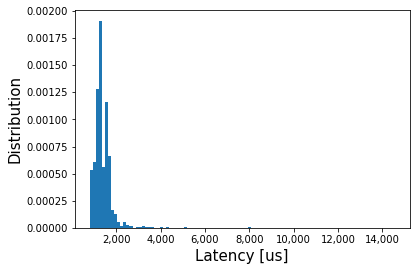

In [6]:
#rviz2:callback3 duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'

c = '94682263168816' # callback symbol

f = open(path)
#print(type(f))
f.close()

with open(path) as f:
    l = f.readlines()
    
# S = l.index('Callback symbols:\n')
# E = l.index('Callback instances:\n')  
# cb3_name = [line for line in l[S:E] if c in line]
# cb3_name = ''.join(cb3_name)
# cb3_name = cb3_name.split()[2]
# print(cb3_name)

S = l.index('Callback instances:\n')
E = l.index('Lifecycle state machines:\n') 
#print(S,E)

cb3 = [line for line in l[S:E] if c in line]
print(len(cb3))

cb3d = []
for i in cb3:
    #print(i)
    cb3d.append(int(i.split()[3])) 
print(len(cb3d),max(cb3d),min(cb3d))

cb = str(hex(int(c)))
cb = cb.upper().replace('X', 'x')
print(cb)

cb3d_us = []
for i in cb3d:
    cb3d_us.append(i/1000)
print(len(cb3d_us),max(cb3d_us),min(cb3d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb3d_us, bins=100, density=True)
#plt.title(cb3_name.split('::')[3], fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,200000)
plt.savefig("cb3d.pdf")
print(np.average(cb3d_us))

0x561CEEA9A730
2852 5802.833 66.947


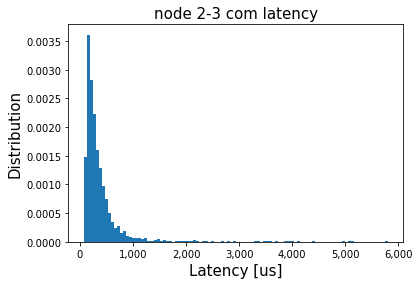

In [7]:
#calculate the cb2 - cb3 com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

print(cb)
com3_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com3_latency_ns.append(com)

com3_latency_us = []
for i in com3_latency_ns:
    com3_latency_us.append(i/1000)
print(len(com3_latency_us),max(com3_latency_us),min(com3_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com3_latency_us, bins=100, density=True)
plt.title('node 2-3 com latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,1000000)
plt.savefig("cb23latency.pdf")

In [8]:
# publish handle of /planning/goal_pose
# rviz2
# 94682264313232    1627649855208764094   94682243265936  94682265250960                                /planning/goal_pose     5
# 561CEEBB1D90
# 94682265289248    1627649855211974237   94682243265936  94682265399136                                /planning/goal_pose     5
# 561CEECA0220
path = '/home/saitama1/AVP_e2e/rclcpp_publish.txt'
f = open(path)
#print(type(f))
f.close()
#record node pub
pub_handle = []
with open(path) as f:
    l = f.readlines()
for i in l:
    publisher_handle = i.split(",")[4].split("= ")[1]
    #print(publisher_handle)
    if (publisher_handle == '0x561CEECA0220'):
        #print(i)
        ph = i.split(",")[4].split("= ")[1]
        #print(ph)
        ph = ph.lstrip('0x')
        ph = str(int(ph, 16))
        pub_handle.append(ph)
#pub_handle = set(pub_handle)
print(len(pub_handle))

5


std::_Bind<void
5
5 1198982180 862547564
0x55F635EF6060
5 1198982.18 862547.564
1011734.2216


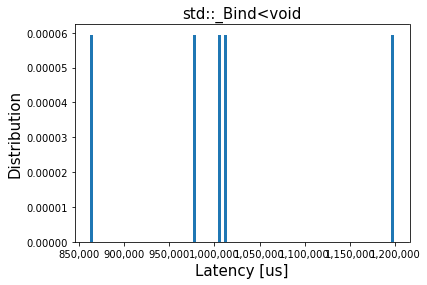

In [9]:
#lanelet2_global:callback4 duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'

c = '94515955196000' # callback symbol

f = open(path)
#print(type(f))
f.close()

with open(path) as f:
    l = f.readlines()
    
S = l.index('Callback symbols:\n')
E = l.index('Callback instances:\n')  
cb4_name = [line for line in l[S:E] if c in line]
cb4_name = ''.join(cb4_name)
cb4_name = cb4_name.split()[2]
print(cb4_name)

S = l.index('Callback instances:\n')
E = l.index('Lifecycle state machines:\n') 
#print(S,E)

cb4 = [line for line in l[S:E] if c in line]
print(len(cb4))

cb4d = []
for i in cb4:
    #print(i)
    cb4d.append(int(i.split()[3])) 
print(len(cb4d),max(cb4d),min(cb4d))

cb = str(hex(int(c)))
cb = cb.upper().replace('X', 'x')
print(cb)

cb4d_us = []
for i in cb4d:
    cb4d_us.append(i/1000)
print(len(cb4d_us),max(cb4d_us),min(cb4d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb4d_us, bins=100, density=True)
plt.title(cb4_name, fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,200000)
plt.savefig("cb4d.pdf")
print(np.average(cb4d_us))

0x55F635EF6060
5 3635.689 74.725


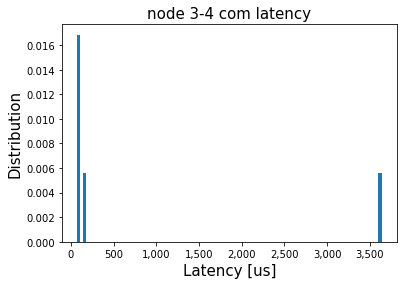

In [10]:
#calculate the cb3 - cb4 com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

print(cb)
com4_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com4_latency_ns.append(com)

com4_latency_us = []
for i in com4_latency_ns:
    com4_latency_us.append(i/1000)
print(len(com4_latency_us),max(com4_latency_us),min(com4_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com4_latency_us, bins=100, density=True)
plt.title('node 3-4 com latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,1000000)
plt.savefig("cb34latency.pdf")

autoware::behavior_planner_nodes::BehaviorPlan...
5
5 786746 93167
0x560965725C30
5 786.746 93.167
258.5018


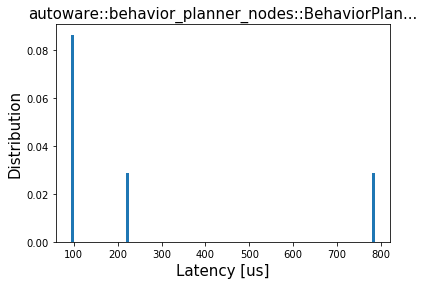

In [12]:
#behavior_planne:callback5 duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'

c = '94598356687920' # callback symbol

f = open(path)
#print(type(f))
f.close()

with open(path) as f:
    l = f.readlines()
    
S = l.index('Callback symbols:\n')
E = l.index('Callback instances:\n')  
cb5_name = [line for line in l[S:E] if c in line]
cb5_name = ''.join(cb5_name)
cb5_name = cb5_name.split()[2]
print(cb5_name)

S = l.index('Callback instances:\n')
E = l.index('Lifecycle state machines:\n') 
#print(S,E)

cb5 = [line for line in l[S:E] if c in line]
print(len(cb5))

cb5d = []
for i in cb5:
    #print(i)
    cb5d.append(int(i.split()[3])) 
print(len(cb5d),max(cb5d),min(cb5d))

cb = str(hex(int(c)))
cb = cb.upper().replace('X', 'x')
print(cb)

cb5d_us = []
for i in cb5d:
    cb5d_us.append(i/1000)
print(len(cb5d_us),max(cb5d_us),min(cb5d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb5d_us, bins=100, density=True)
plt.title(cb5_name, fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,200000)
plt.savefig("cb5d.pdf")
print(np.average(cb5d_us))

0x560965725C30
5 226.964 86.869


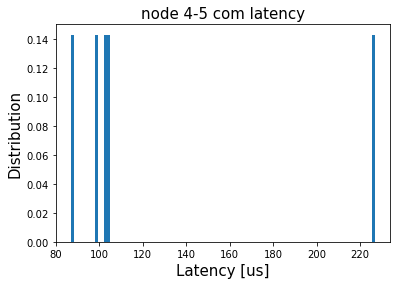

In [13]:
#calculate the cb4 - cb5 com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

print(cb)
com5_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com5_latency_ns.append(com)

com5_latency_us = []
for i in com5_latency_ns:
    com5_latency_us.append(i/1000)
print(len(com5_latency_us),max(com5_latency_us),min(com5_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com5_latency_us, bins=100, density=True)
plt.title('node 4-5 com latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,1000000)
plt.savefig("cb45latency.pdf")

In [13]:
#mpc_controller_:callback6 duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'

c = '' # callback symbol

f = open(path)
#print(type(f))
f.close()

with open(path) as f:
    l = f.readlines()
    
S = l.index('Callback symbols:\n')
E = l.index('Callback instances:\n')  
cb6_name = [line for line in l[S:E] if c in line]
cb6_name = ''.join(cb6_name)
cb6_name = cb6_name.split()[2]
print(cb6_name)

S = l.index('Callback instances:\n')
E = l.index('Lifecycle state machines:\n') 
#print(S,E)

cb6 = [line for line in l[S:E] if c in line]
print(len(cb6))

cb6d = []
for i in cb6:
    #print(i)
    cb6d.append(int(i.split()[3])) 
print(len(cb6d),max(cb6d),min(cb6d))

cb = str(hex(int(c)))
cb = cb.upper().replace('X', 'x')
print(cb)

cb6d_us = []
for i in cb6d:
    cb6d_us.append(i/1000)
print(len(cb6d_us),max(cb6d_us),min(cb6d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb6d_us, bins=100, density=True)
plt.title(cb6_name.split('::')[3], fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,200000)
plt.savefig("cb6d.pdf")
print(np.average(cb6d_us))

timestamp
361661


IndexError: list index out of range

In [ ]:
#calculate the cb5 - cb6 com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

print(cb)
com6_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com6_latency_ns.append(com)

com6_latency_us = []
for i in com6_latency_ns:
    com6_latency_us.append(i/1000)
print(len(com6_latency_us),max(com6_latency_us),min(com6_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com6_latency_us, bins=100, density=True)
plt.title('node 5-6 com latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
#plt.xlim(0,1000000)
plt.savefig("cb56latency.pdf")

In [ ]:
#e2e latency:cb1d_us+com1_latency_us+cb2d_us+com2_latency_us
e2e = [a+b+c+d for (a, b, c, d) in zip(cb1d_us,com1_latency_us,cb2d_us,com2_latency_us)]

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(e2e, bins=100, density=True)
plt.title('end-to-end latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Distribution", fontsize=15)
plt.savefig("e2elatency.pdf")

In [ ]:
cb1d_ave = np.average(cb1d_us)
com1_latency_ave = np.average(com1_latency_us)
cb2d_ave = np.average(cb2d_us)
com2_latency_ave = np.average(com2_latency_us)
e2e_ave = np.average(e2e_us)
print(cb1d_ave,com1_latency_ave,cb2d_ave,com2_latency_ave,e2e_ave)

compare = [com1_latency_ave,cb1d_ave,com2_latency_ave,cb2d_ave,e2e_ave]
x = np.array([1, 2, 3, 4, 5])
label = ["node0-1","node1","node1-2","node2","end-to-end"]

fig, ax = plt.subplots(1, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('average latency compare')
plt.xlabel('comparison')
plt.ylabel('latency')
plt.bar(x, compare, tick_label=label, align="center")
plt.savefig("compare.pdf")

AttributeError: 'Line2D' object has no attribute 'set_facecolor'

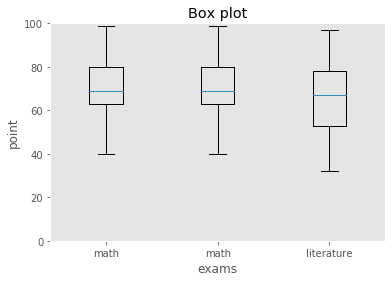

In [21]:
import matplotlib.pyplot as plt
import numpy as np

math = [74, 65, 40, 62, 85, 67, 82, 71, 60, 99]
math = [74, 65, 40, 62, 85, 67, 82, 71, 60, 99]
literature = [81, 62, 32, 67, 41, 50, 85, 70, 67, 97]
# 点数のタプル
points = (math, math, literature)

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(points)
ax.set_xticklabels(['math','math', 'literature'])

plt.title('Box plot')
plt.xlabel('exams')
plt.ylabel('point')
# Y軸のメモリのrange
plt.ylim([0,100])
plt.grid()

colors=['#1E90FF80', '#8A2BE280']

# boxの色の設定
for b, c in zip(bp['boxes'], colors):
    b.set(color='black', linewidth=1)  # boxの外枠の色
    b.set_facecolor(c) # boxの色

